<a href="https://colab.research.google.com/github/saksh-aam/ML-Models-for-Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/Nifty50.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...,...
3698,2022-09-08,17748.150391,17807.650391,17691.949219,17798.750000,17798.750000,279800.0
3699,2022-09-09,17923.349609,17925.949219,17786.000000,17833.349609,17833.349609,270300.0
3700,2022-09-12,17890.849609,17980.550781,17889.150391,17936.349609,17936.349609,228200.0
3701,2022-09-13,18044.449219,18088.300781,18015.449219,18070.050781,18070.050781,259900.0


In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2007-09-17,4494.649902
1,2007-09-18,4546.200195
2,2007-09-19,4732.350098
3,2007-09-20,4747.549805
4,2007-09-21,4837.549805
...,...,...
3698,2022-09-08,17798.750000
3699,2022-09-09,17833.349609
3700,2022-09-12,17936.349609
3701,2022-09-13,18070.050781


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2007-09-17
1      2007-09-18
2      2007-09-19
3      2007-09-20
4      2007-09-21
          ...    
3698   2022-09-08
3699   2022-09-09
3700   2022-09-12
3701   2022-09-13
3702   2022-09-14
Name: Date, Length: 3703, dtype: datetime64[ns]

In [6]:
df.index = df.pop('Date')
df

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805
...,...
2022-09-08,17798.750000
2022-09-09,17833.349609
2022-09-12,17936.349609


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df[['Close']]=scaler.fit_transform(df[['Close']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


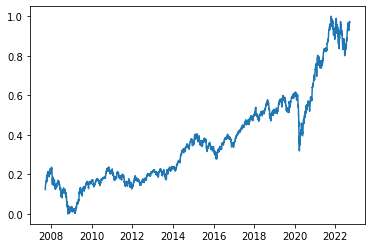

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,0.765518,0.770430,0.753796,0.739724
1,2021-03-26,0.770430,0.753796,0.739724,0.751157
2,2021-03-30,0.753796,0.739724,0.751157,0.772332
3,2021-03-31,0.739724,0.751157,0.772332,0.762654
4,2021-04-01,0.751157,0.772332,0.762654,0.773727
...,...,...,...,...,...
241,2022-03-16,0.884246,0.899344,0.886287,0.905866
242,2022-03-17,0.899344,0.886287,0.905866,0.925405
243,2022-03-21,0.886287,0.905866,0.925405,0.914783
244,2022-03-22,0.905866,0.925405,0.914783,0.927189


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((246,), (246, 3, 1), (246,))

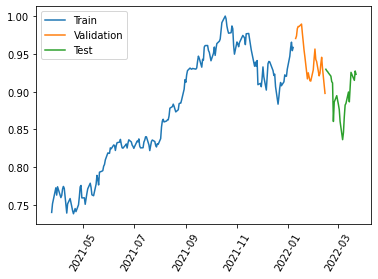

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.xticks(rotation=60)
plt.legend(['Train', 'Validation', 'Test'])

# **Model with LSTM Layer**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1/7 [===>..........................] - ETA: 40s - loss: 0.7110 - root_mean_squared_error: 0.8432

7/7 [==============================] - 11s 761ms/step - loss: 0.5881 - root_mean_squared_error: 0.7669 - val_loss: 0.4906 - val_root_mean_squared_error: 0.7004
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4205 - root_mean_squared_error: 0.6484

7/7 [==============================] - 4s 630ms/step - loss: 0.3200 - root_mean_squared_error: 0.5657 - val_loss: 0.1961 - val_root_mean_squared_error: 0.4428
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.1617 - root_mean_squared_error: 0.4021

7/7 [==============================] - 4s 687ms/step - loss: 0.0905 - root_mean_squared_error: 0.3008 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - root_mean_squared_error: 0.0846 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0292 - root_mean_squared_error: 0.1709

7/7 [==============================] - 4s 634ms/step - loss: 0.0273 - root_mean_squared_error: 0.1652 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0797
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0857

7/7 [==============================] - 5s 885ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 8/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0649

7/7 [==============================] - 5s 878ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 7.2042e-04 - val_root_mean_squared_error: 0.0268
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 4.6094e-04 - root_mean_squared_error: 0.0215

7/7 [==============================] - 5s 842ms/step - loss: 9.5049e-04 - root_mean_squared_error: 0.0308 - val_loss: 4.6602e-04 - val_root_mean_squared_error: 0.0216
Epoch 10/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0419

7/7 [==============================] - 4s 628ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 4.2860e-04 - val_root_mean_squared_error: 0.0207
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 6.2302e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 12/100
7/7 [==============================] - 0s 7ms/step - loss: 7.2832e-04 - root_mean_squared_error: 0.0270 - val_loss: 9.4388e-04 - val_root_mean_squared_error: 0.0307
Epoch 13/100
7/7 [==============================] - 0s 7ms/step - loss: 6.2871e-04 - root_mean_squared_error: 0.0251 - val_loss: 5.4955e-04 - val_root_mean_squared_error: 0.0234
Epoch 14/100
7/7 [==============================] - 0s 7ms/step - loss: 6.2081e-04 - root_mean_squared_error: 0.0249 - val_loss: 4.3213e-04 - val_root_mean_squared_error: 0.0208
Epoch 15/100
7/7 [==============================] - 0s 7ms/step - loss: 6.3962e-04 - root_mean_squared_error: 0.0253 - val_loss: 

7/7 [==============================] - 4s 689ms/step - loss: 4.1950e-04 - root_mean_squared_error: 0.0205 - val_loss: 3.8219e-04 - val_root_mean_squared_error: 0.0195
Epoch 51/100
7/7 [==============================] - 0s 7ms/step - loss: 4.0341e-04 - root_mean_squared_error: 0.0201 - val_loss: 5.0296e-04 - val_root_mean_squared_error: 0.0224
Epoch 52/100
7/7 [==============================] - 0s 7ms/step - loss: 4.0951e-04 - root_mean_squared_error: 0.0202 - val_loss: 4.5751e-04 - val_root_mean_squared_error: 0.0214
Epoch 53/100
1/7 [===>..........................] - ETA: 0s - loss: 4.2495e-04 - root_mean_squared_error: 0.0206

7/7 [==============================] - 4s 629ms/step - loss: 3.9745e-04 - root_mean_squared_error: 0.0199 - val_loss: 3.6674e-04 - val_root_mean_squared_error: 0.0192
Epoch 54/100
7/7 [==============================] - 0s 7ms/step - loss: 3.9009e-04 - root_mean_squared_error: 0.0198 - val_loss: 5.1713e-04 - val_root_mean_squared_error: 0.0227
Epoch 55/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7687e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.2083e-04 - val_root_mean_squared_error: 0.0205
Epoch 56/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7398e-04 - root_mean_squared_error: 0.0193 - val_loss: 4.3121e-04 - val_root_mean_squared_error: 0.0208
Epoch 57/100
7/7 [==============================] - 0s 7ms/step - loss: 3.7731e-04 - root_mean_squared_error: 0.0194 - val_loss: 3.7256e-04 - val_root_mean_squared_error: 0.0193
Epoch 58/100
7/7 [==============================] - 0s 7ms/step - loss: 3.6194e-04 - root_mean_squared_error: 0.0190 - va

7/7 [==============================] - 5s 791ms/step - loss: 3.5046e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.4799e-04 - val_root_mean_squared_error: 0.0187
Epoch 63/100
7/7 [==============================] - 0s 7ms/step - loss: 3.4029e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.7923e-04 - val_root_mean_squared_error: 0.0219
Epoch 64/100
7/7 [==============================] - 0s 7ms/step - loss: 3.4037e-04 - root_mean_squared_error: 0.0184 - val_loss: 4.1612e-04 - val_root_mean_squared_error: 0.0204
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 3.2169e-04 - root_mean_squared_error: 0.0179 - val_loss: 4.1313e-04 - val_root_mean_squared_error: 0.0203
Epoch 66/100
7/7 [==============================] - 0s 7ms/step - loss: 3.1646e-04 - root_mean_squared_error: 0.0178 - val_loss: 4.1111e-04 - val_root_mean_squared_error: 0.0203
Epoch 67/100
7/7 [==============================] - 0s 7ms/step - loss: 3.1115e-04 - root_mean_squared_error: 0.0176 - va

7/7 [==============================] - 4s 680ms/step - loss: 2.9057e-04 - root_mean_squared_error: 0.0170 - val_loss: 3.4748e-04 - val_root_mean_squared_error: 0.0186
Epoch 72/100
7/7 [==============================] - 0s 10ms/step - loss: 3.0230e-04 - root_mean_squared_error: 0.0174 - val_loss: 3.5765e-04 - val_root_mean_squared_error: 0.0189
Epoch 73/100
7/7 [==============================] - 0s 7ms/step - loss: 2.7729e-04 - root_mean_squared_error: 0.0167 - val_loss: 4.0498e-04 - val_root_mean_squared_error: 0.0201
Epoch 74/100
7/7 [==============================] - 0s 7ms/step - loss: 2.7622e-04 - root_mean_squared_error: 0.0166 - val_loss: 3.7937e-04 - val_root_mean_squared_error: 0.0195
Epoch 75/100
7/7 [==============================] - 0s 7ms/step - loss: 2.6854e-04 - root_mean_squared_error: 0.0164 - val_loss: 3.9643e-04 - val_root_mean_squared_error: 0.0199
Epoch 76/100
7/7 [==============================] - 0s 7ms/step - loss: 2.6804e-04 - root_mean_squared_error: 0.0164 - v

7/7 [==============================] - 4s 641ms/step - loss: 2.4174e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.3201e-04 - val_root_mean_squared_error: 0.0182
Epoch 82/100
7/7 [==============================] - 0s 7ms/step - loss: 2.4629e-04 - root_mean_squared_error: 0.0157 - val_loss: 3.5736e-04 - val_root_mean_squared_error: 0.0189
Epoch 83/100
7/7 [==============================] - 0s 7ms/step - loss: 2.4168e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.4484e-04 - val_root_mean_squared_error: 0.0186
Epoch 84/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3438e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.4914e-04 - val_root_mean_squared_error: 0.0187
Epoch 85/100
7/7 [==============================] - 0s 7ms/step - loss: 2.3267e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.7841e-04 - val_root_mean_squared_error: 0.0195
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 1.8776e-04 - root_mean_squared_error: 0.0137

7/7 [==============================] - 4s 689ms/step - loss: 2.3151e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.3187e-04 - val_root_mean_squared_error: 0.0182
Epoch 87/100
7/7 [==============================] - 0s 7ms/step - loss: 2.2025e-04 - root_mean_squared_error: 0.0148 - val_loss: 3.6584e-04 - val_root_mean_squared_error: 0.0191
Epoch 88/100
7/7 [==============================] - 0s 7ms/step - loss: 2.2001e-04 - root_mean_squared_error: 0.0148 - val_loss: 3.3468e-04 - val_root_mean_squared_error: 0.0183
Epoch 89/100
7/7 [==============================] - 0s 7ms/step - loss: 2.1328e-04 - root_mean_squared_error: 0.0146 - val_loss: 3.6284e-04 - val_root_mean_squared_error: 0.0190
Epoch 90/100
1/7 [===>..........................] - ETA: 0s - loss: 2.3590e-04 - root_mean_squared_error: 0.0154

7/7 [==============================] - 4s 675ms/step - loss: 2.1043e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.2987e-04 - val_root_mean_squared_error: 0.0182
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 2.0925e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.3158e-04 - val_root_mean_squared_error: 0.0182
Epoch 92/100
7/7 [==============================] - 0s 9ms/step - loss: 2.0829e-04 - root_mean_squared_error: 0.0144 - val_loss: 3.4291e-04 - val_root_mean_squared_error: 0.0185
Epoch 93/100
7/7 [==============================] - 0s 7ms/step - loss: 2.1572e-04 - root_mean_squared_error: 0.0147 - val_loss: 3.3629e-04 - val_root_mean_squared_error: 0.0183
Epoch 94/100
7/7 [==============================] - 0s 7ms/step - loss: 2.1143e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.3836e-04 - val_root_mean_squared_error: 0.0184
Epoch 95/100
1/7 [===>..........................] - ETA: 0s - loss: 2.9726e-04 - root_mean_squared_error: 0.0172

7/7 [==============================] - 4s 632ms/step - loss: 2.1317e-04 - root_mean_squared_error: 0.0146 - val_loss: 3.2849e-04 - val_root_mean_squared_error: 0.0181
Epoch 96/100
1/7 [===>..........................] - ETA: 0s - loss: 2.7992e-04 - root_mean_squared_error: 0.0167

7/7 [==============================] - 4s 704ms/step - loss: 2.2214e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.2304e-04 - val_root_mean_squared_error: 0.0180
Epoch 97/100
7/7 [==============================] - 0s 7ms/step - loss: 2.0349e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.2709e-04 - val_root_mean_squared_error: 0.0181
Epoch 98/100
1/7 [===>..........................] - ETA: 0s - loss: 1.7113e-04 - root_mean_squared_error: 0.0131

7/7 [==============================] - 4s 637ms/step - loss: 1.9900e-04 - root_mean_squared_error: 0.0141 - val_loss: 3.2239e-04 - val_root_mean_squared_error: 0.0180
Epoch 99/100
7/7 [==============================] - 0s 7ms/step - loss: 1.8910e-04 - root_mean_squared_error: 0.0138 - val_loss: 3.3347e-04 - val_root_mean_squared_error: 0.0183
Epoch 100/100
7/7 [==============================] - 0s 7ms/step - loss: 1.8642e-04 - root_mean_squared_error: 0.0137 - val_loss: 3.3608e-04 - val_root_mean_squared_error: 0.0183


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


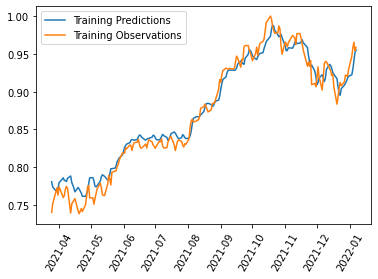

In [14]:
from tensorflow.keras.models import load_model
model = load_model('model1/')
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=60)
plt.legend(['Training Predictions', 'Training Observations'])

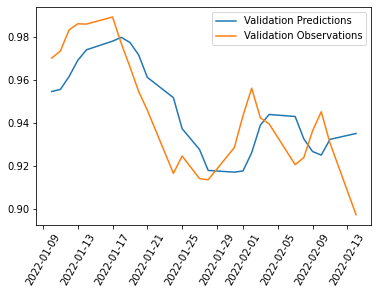

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation=60)
plt.legend(['Validation Predictions', 'Validation Observations'])

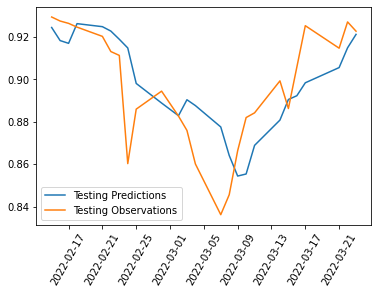

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation=60)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [17]:
from sklearn.metrics import mean_absolute_error,precision_score,recall_score,f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# testy_predictions = model.predict(y_test)
print("Mean Absolute error ", mean_absolute_error(  y_test, test_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test_predictions  ))
print("R2 score ",r2_score(  y_test, test_predictions  ))

# print("Accuracy ",accuracy_score(y_test, test_predictions))
# print('precision',precision_score(y_test,test_predictions))
# model.evaluate(y_test,test_predictions)

Mean Absolute error  0.014474156
Mean Squared error  0.00036652456
R2 score  0.5098583194555587


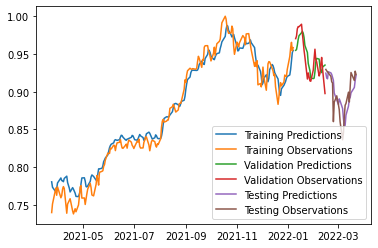

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

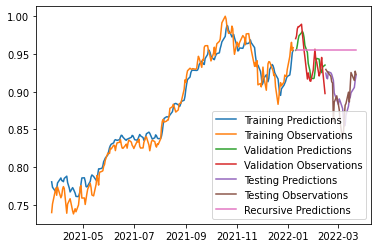

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

# **Model with Conv1D Layer**

In [22]:
model2 = Sequential([layers.Input((3, 1)),
                    layers.Conv1D(64, kernel_size=3),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             256       
                                                                 
 dense_3 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_4 (Dense)             (None, 1, 32)             1056      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [23]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp2])

Epoch 1/100
7/7 [==============================] - 9s 173ms/step - loss: 0.6158 - root_mean_squared_error: 0.7873 - val_loss: 0.4343 - val_root_mean_squared_error: 0.6590
Epoch 2/100
7/7 [==============================] - 1s 175ms/step - loss: 0.2612 - root_mean_squared_error: 0.5132 - val_loss: 0.1294 - val_root_mean_squared_error: 0.3597
Epoch 3/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0589 - root_mean_squared_error: 0.2446 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0136 - root_mean_squared_error: 0.1159 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1421
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0299 - root_mean_squared_error: 0.1732 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 6/100
7/7 [==============================] - 1s 142ms/step - loss: 0.0132 - root_mean_squared_error: 0.1154 - val_loss: 0.0021 - val_root_mean_

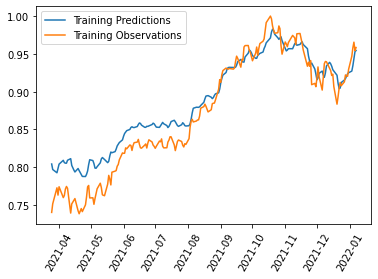

In [24]:
model2 = load_model('model2/')
train_predictions = model2.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=60)
plt.legend(['Training Predictions', 'Training Observations'])

In [25]:
model2 = load_model('model2/')
test2_predictions = model2.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test2_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test2_predictions  ))
print("R2 score ",r2_score(  y_test, test2_predictions  ))

Mean Absolute error  0.014035769
Mean Squared error  0.00042868743
R2 score  0.4267298741074649


# **Model with GRU Layer**

In [27]:
model3 = Sequential([layers.Input((3, 1)),
                    layers.GRU(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,033
Trainable params: 16,033
Non-trainable params: 0
_________________________________________________________________


In [28]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp3])

Epoch 1/100
1/7 [===>..........................] - ETA: 11s - loss: 0.7581 - root_mean_squared_error: 0.8707

7/7 [==============================] - 6s 634ms/step - loss: 0.6786 - root_mean_squared_error: 0.8238 - val_loss: 0.6666 - val_root_mean_squared_error: 0.8164
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5630 - root_mean_squared_error: 0.7503

7/7 [==============================] - 3s 558ms/step - loss: 0.4953 - root_mean_squared_error: 0.7038 - val_loss: 0.4261 - val_root_mean_squared_error: 0.6528
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3614 - root_mean_squared_error: 0.6011

7/7 [==============================] - 4s 610ms/step - loss: 0.2685 - root_mean_squared_error: 0.5182 - val_loss: 0.1486 - val_root_mean_squared_error: 0.3855
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.1158 - root_mean_squared_error: 0.3403

7/7 [==============================] - 3s 552ms/step - loss: 0.0577 - root_mean_squared_error: 0.2402 - val_loss: 7.5437e-04 - val_root_mean_squared_error: 0.0275
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0147 - root_mean_squared_error: 0.1210 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1719
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0326 - root_mean_squared_error: 0.1805

7/7 [==============================] - 4s 615ms/step - loss: 0.0211 - root_mean_squared_error: 0.1454 - val_loss: 5.3757e-04 - val_root_mean_squared_error: 0.0232
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512

7/7 [==============================] - 3s 546ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 3.1698e-04 - val_root_mean_squared_error: 0.0178
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 3.8536e-04 - val_root_mean_squared_error: 0.0196
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 9.3664e-04 - val_root_mean_squared_error: 0.0306
Epoch 12/100
7/7 [==============================] - 0s 7ms/step - loss: 9.2016e-04 - root_mean_squared_error: 0.0303 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 13/100
7/7 [==============================] - 0s 7ms/step - loss: 8.5648e-04 - root_mean_squared_error: 0.0293 - val_loss: 7.4040e-04 - val_root_mean_squared_error: 0.0272
Epoch 14/100
7/7 [==============================] - 0s 7ms/step - loss: 8.0908e-04 - root_mean_squared_error: 0.0284 - val_loss: 4.6464e-

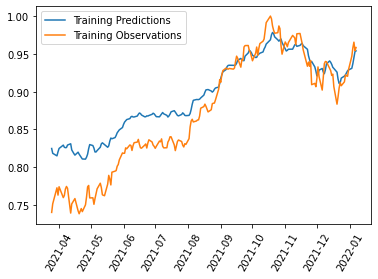

In [29]:
model3 = load_model('model3/')
train_predictions = model3.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=60)
plt.legend(['Training Predictions', 'Training Observations'])

In [30]:
model3 = load_model('model3/')
test3_predictions = model3.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test3_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test3_predictions  ))
print("R2 score ",r2_score(  y_test, test3_predictions  ))

Mean Absolute error  0.016943524
Mean Squared error  0.0006021668
R2 score  0.19474146414329085


# **Model with Bidirectional-LSTM Layers**

In [31]:
import tensorflow as tf

model4 = Sequential([
               layers.Input((3, 1)),
               layers.Bidirectional( tf.keras.layers.LSTM(64, return_sequences=True)),
              layers.Bidirectional( tf.keras.layers.LSTM(32)),
              layers.Dense(1),
            ])
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 3, 128)           33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [32]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp4])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.6277 - root_mean_squared_error: 0.7923 

7/7 [==============================] - 28s 4s/step - loss: 0.6277 - root_mean_squared_error: 0.7923 - val_loss: 0.4197 - val_root_mean_squared_error: 0.6478
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3515 - root_mean_squared_error: 0.5929

7/7 [==============================] - 22s 4s/step - loss: 0.2252 - root_mean_squared_error: 0.4746 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2354
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0429 - root_mean_squared_error: 0.2072

7/7 [==============================] - 22s 4s/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0378 - root_mean_squared_error: 0.1944

7/7 [==============================] - 22s 4s/step - loss: 0.0398 - root_mean_squared_error: 0.1995 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1015

7/7 [==============================] - 22s 4s/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0078 - root_mean_squared_error: 0.0884 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 7/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0781

7/7 [==============================] - 22s 4s/step - loss: 0.0034 - root_mean_squared_error: 0.0585 - val_loss: 4.0564e-04 - val_root_mean_squared_error: 0.0201
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0410

7/7 [==============================] - 22s 4s/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 3.6149e-04 - val_root_mean_squared_error: 0.0190
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 5.1510e-04 - root_mean_squared_error: 0.0227 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 11/100
7/7 [==============================] - 0s 12ms/step - loss: 6.3722e-04 - root_mean_squared_error: 0.0252 - val_loss: 5.6213e-04 - val_root_mean_squared_error: 0.0237
Epoch 12/100
1/7 [===>..........................] - ETA: 0s - loss: 4.0559e-04 - root_mean_squared_error: 0.0201

7/7 [==============================] - 22s 4s/step - loss: 4.3131e-04 - root_mean_squared_error: 0.0208 - val_loss: 3.3635e-04 - val_root_mean_squared_error: 0.0183
Epoch 13/100
7/7 [==============================] - 0s 11ms/step - loss: 4.2897e-04 - root_mean_squared_error: 0.0207 - val_loss: 4.7419e-04 - val_root_mean_squared_error: 0.0218
Epoch 14/100
7/7 [==============================] - 0s 14ms/step - loss: 4.0589e-04 - root_mean_squared_error: 0.0201 - val_loss: 5.0490e-04 - val_root_mean_squared_error: 0.0225
Epoch 15/100
7/7 [==============================] - 0s 11ms/step - loss: 4.0387e-04 - root_mean_squared_error: 0.0201 - val_loss: 4.6146e-04 - val_root_mean_squared_error: 0.0215
Epoch 16/100
7/7 [==============================] - 0s 11ms/step - loss: 3.9837e-04 - root_mean_squared_error: 0.0200 - val_loss: 4.0793e-04 - val_root_mean_squared_error: 0.0202
Epoch 17/100
7/7 [==============================] - 0s 11ms/step - loss: 3.9189e-04 - root_mean_squared_error: 0.0198 -

7/7 [==============================] - 22s 4s/step - loss: 3.5184e-04 - root_mean_squared_error: 0.0188 - val_loss: 3.2872e-04 - val_root_mean_squared_error: 0.0181
Epoch 28/100
7/7 [==============================] - 0s 11ms/step - loss: 3.6739e-04 - root_mean_squared_error: 0.0192 - val_loss: 3.8175e-04 - val_root_mean_squared_error: 0.0195
Epoch 29/100
7/7 [==============================] - 0s 10ms/step - loss: 3.3547e-04 - root_mean_squared_error: 0.0183 - val_loss: 4.8537e-04 - val_root_mean_squared_error: 0.0220
Epoch 30/100
7/7 [==============================] - 0s 13ms/step - loss: 3.4299e-04 - root_mean_squared_error: 0.0185 - val_loss: 4.3489e-04 - val_root_mean_squared_error: 0.0209
Epoch 31/100
7/7 [==============================] - 0s 10ms/step - loss: 3.2652e-04 - root_mean_squared_error: 0.0181 - val_loss: 3.6807e-04 - val_root_mean_squared_error: 0.0192
Epoch 32/100
7/7 [==============================] - 0s 11ms/step - loss: 3.3308e-04 - root_mean_squared_error: 0.0183 -

7/7 [==============================] - 22s 4s/step - loss: 2.9065e-04 - root_mean_squared_error: 0.0170 - val_loss: 3.2763e-04 - val_root_mean_squared_error: 0.0181
Epoch 45/100
7/7 [==============================] - 0s 11ms/step - loss: 2.8545e-04 - root_mean_squared_error: 0.0169 - val_loss: 4.3654e-04 - val_root_mean_squared_error: 0.0209
Epoch 46/100
1/7 [===>..........................] - ETA: 0s - loss: 3.2515e-04 - root_mean_squared_error: 0.0180

7/7 [==============================] - 22s 4s/step - loss: 2.6401e-04 - root_mean_squared_error: 0.0162 - val_loss: 3.1024e-04 - val_root_mean_squared_error: 0.0176
Epoch 47/100
7/7 [==============================] - 0s 10ms/step - loss: 2.7330e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.8258e-04 - val_root_mean_squared_error: 0.0196
Epoch 48/100
7/7 [==============================] - 0s 13ms/step - loss: 2.5252e-04 - root_mean_squared_error: 0.0159 - val_loss: 3.1753e-04 - val_root_mean_squared_error: 0.0178
Epoch 49/100
7/7 [==============================] - 0s 11ms/step - loss: 2.7321e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.3904e-04 - val_root_mean_squared_error: 0.0184
Epoch 50/100
7/7 [==============================] - 0s 10ms/step - loss: 2.4641e-04 - root_mean_squared_error: 0.0157 - val_loss: 3.7466e-04 - val_root_mean_squared_error: 0.0194
Epoch 51/100
7/7 [==============================] - 0s 11ms/step - loss: 2.5142e-04 - root_mean_squared_error: 0.0159 -

7/7 [==============================] - 21s 4s/step - loss: 2.2046e-04 - root_mean_squared_error: 0.0148 - val_loss: 3.0666e-04 - val_root_mean_squared_error: 0.0175
Epoch 60/100
7/7 [==============================] - 0s 11ms/step - loss: 2.2423e-04 - root_mean_squared_error: 0.0150 - val_loss: 3.4583e-04 - val_root_mean_squared_error: 0.0186
Epoch 61/100
7/7 [==============================] - 0s 11ms/step - loss: 2.3029e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.2797e-04 - val_root_mean_squared_error: 0.0181
Epoch 62/100
7/7 [==============================] - 0s 11ms/step - loss: 2.0381e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.1030e-04 - val_root_mean_squared_error: 0.0176
Epoch 63/100
7/7 [==============================] - 0s 11ms/step - loss: 2.0107e-04 - root_mean_squared_error: 0.0142 - val_loss: 3.3499e-04 - val_root_mean_squared_error: 0.0183
Epoch 64/100
7/7 [==============================] - 0s 11ms/step - loss: 1.9781e-04 - root_mean_squared_error: 0.0141 -

In [33]:
model4 = load_model('model4/')
test4_predictions = model4.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test4_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test4_predictions  ))
print("R2 score ",r2_score(  y_test, test4_predictions  ))
# print("Accuracy ",accuracy_score(  y_test, test_predictions  ))

Mean Absolute error  0.014083784
Mean Squared error  0.00035295062
R2 score  0.5280103817734156


# **Model with combination of Layers**

In [34]:
model5 = Sequential([
               layers.Input((3, 1)),
              layers.Conv1D(filters=64,kernel_size=5,strides=1,activation='relu',padding='same'),
                layers.Conv1D(filters=128,kernel_size=5,strides=1,activation='relu',padding='same'),
               layers.LSTM(64, return_sequences=True),
              layers.LSTM(32),
              layers.Dense(1),
            ])
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 3, 64)             384       
                                                                 
 conv1d_2 (Conv1D)           (None, 3, 128)            41088     
                                                                 
 lstm_3 (LSTM)               (None, 3, 64)             49408     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 103,329
Trainable params: 103,329
Non-trainable params: 0
_________________________________________________________________


In [35]:
model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp5])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.6224 - root_mean_squared_error: 0.7889 

7/7 [==============================] - 11s 1s/step - loss: 0.6224 - root_mean_squared_error: 0.7889 - val_loss: 0.4061 - val_root_mean_squared_error: 0.6373
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3431 - root_mean_squared_error: 0.5857

7/7 [==============================] - 7s 1s/step - loss: 0.1466 - root_mean_squared_error: 0.3829 - val_loss: 0.0823 - val_root_mean_squared_error: 0.2869
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0789 - root_mean_squared_error: 0.2809

7/7 [==============================] - 8s 1s/step - loss: 0.0658 - root_mean_squared_error: 0.2566 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.1582

7/7 [==============================] - 7s 1s/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 3.5054e-04 - val_root_mean_squared_error: 0.0187
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0058 - root_mean_squared_error: 0.0758 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0497
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0381 - val_loss: 4.4632e-04 - val_root_mean_squared_error: 0.0211
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0016 - val_root_mean_squared_erro

7/7 [==============================] - 7s 1s/step - loss: 3.8587e-04 - root_mean_squared_error: 0.0196 - val_loss: 3.4608e-04 - val_root_mean_squared_error: 0.0186
Epoch 47/100
7/7 [==============================] - 0s 9ms/step - loss: 4.1271e-04 - root_mean_squared_error: 0.0203 - val_loss: 4.9638e-04 - val_root_mean_squared_error: 0.0223
Epoch 48/100
7/7 [==============================] - 0s 8ms/step - loss: 3.6572e-04 - root_mean_squared_error: 0.0191 - val_loss: 4.3071e-04 - val_root_mean_squared_error: 0.0208
Epoch 49/100
7/7 [==============================] - 0s 9ms/step - loss: 3.5031e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.9289e-04 - val_root_mean_squared_error: 0.0198
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 3.3191e-04 - root_mean_squared_error: 0.0182 - val_loss: 3.6046e-04 - val_root_mean_squared_error: 0.0190
Epoch 51/100
7/7 [==============================] - 0s 9ms/step - loss: 3.3335e-04 - root_mean_squared_error: 0.0183 - val_l

7/7 [==============================] - 8s 1s/step - loss: 3.0715e-04 - root_mean_squared_error: 0.0175 - val_loss: 3.1834e-04 - val_root_mean_squared_error: 0.0178
Epoch 53/100
7/7 [==============================] - 0s 9ms/step - loss: 3.2585e-04 - root_mean_squared_error: 0.0181 - val_loss: 5.1074e-04 - val_root_mean_squared_error: 0.0226
Epoch 54/100
7/7 [==============================] - 0s 9ms/step - loss: 2.9298e-04 - root_mean_squared_error: 0.0171 - val_loss: 3.4440e-04 - val_root_mean_squared_error: 0.0186
Epoch 55/100
7/7 [==============================] - 0s 9ms/step - loss: 2.7540e-04 - root_mean_squared_error: 0.0166 - val_loss: 4.2979e-04 - val_root_mean_squared_error: 0.0207
Epoch 56/100
7/7 [==============================] - 0s 9ms/step - loss: 2.7211e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.2079e-04 - val_root_mean_squared_error: 0.0179
Epoch 57/100
7/7 [==============================] - 0s 9ms/step - loss: 2.6419e-04 - root_mean_squared_error: 0.0163 - val_l

7/7 [==============================] - 7s 1s/step - loss: 2.7205e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.0960e-04 - val_root_mean_squared_error: 0.0176
Epoch 63/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3280e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.7116e-04 - val_root_mean_squared_error: 0.0193
Epoch 64/100
7/7 [==============================] - 0s 9ms/step - loss: 2.1161e-04 - root_mean_squared_error: 0.0145 - val_loss: 3.7911e-04 - val_root_mean_squared_error: 0.0195
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 2.4025e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.2807e-04 - val_root_mean_squared_error: 0.0181
Epoch 66/100
1/7 [===>..........................] - ETA: 0s - loss: 2.8718e-04 - root_mean_squared_error: 0.0169

7/7 [==============================] - 8s 1s/step - loss: 2.5757e-04 - root_mean_squared_error: 0.0160 - val_loss: 3.0351e-04 - val_root_mean_squared_error: 0.0174
Epoch 67/100
7/7 [==============================] - 0s 9ms/step - loss: 2.4001e-04 - root_mean_squared_error: 0.0155 - val_loss: 5.2188e-04 - val_root_mean_squared_error: 0.0228
Epoch 68/100
7/7 [==============================] - 0s 9ms/step - loss: 2.3144e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.1097e-04 - val_root_mean_squared_error: 0.0176
Epoch 69/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8775e-04 - root_mean_squared_error: 0.0137 - val_loss: 3.2152e-04 - val_root_mean_squared_error: 0.0179
Epoch 70/100
7/7 [==============================] - 0s 9ms/step - loss: 1.7992e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.5498e-04 - val_root_mean_squared_error: 0.0188
Epoch 71/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8233e-04 - root_mean_squared_error: 0.0135 - val_l

7/7 [==============================] - 7s 1s/step - loss: 1.6392e-04 - root_mean_squared_error: 0.0128 - val_loss: 3.0251e-04 - val_root_mean_squared_error: 0.0174
Epoch 75/100
7/7 [==============================] - 0s 9ms/step - loss: 1.6341e-04 - root_mean_squared_error: 0.0128 - val_loss: 3.2489e-04 - val_root_mean_squared_error: 0.0180
Epoch 76/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5556e-04 - root_mean_squared_error: 0.0125 - val_loss: 3.0767e-04 - val_root_mean_squared_error: 0.0175
Epoch 77/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5609e-04 - root_mean_squared_error: 0.0125 - val_loss: 3.0828e-04 - val_root_mean_squared_error: 0.0176
Epoch 78/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5125e-04 - root_mean_squared_error: 0.0123 - val_loss: 3.0419e-04 - val_root_mean_squared_error: 0.0174
Epoch 79/100
7/7 [==============================] - 0s 9ms/step - loss: 1.4689e-04 - root_mean_squared_error: 0.0121 - val_l

7/7 [==============================] - 8s 1s/step - loss: 2.0506e-04 - root_mean_squared_error: 0.0143 - val_loss: 3.0235e-04 - val_root_mean_squared_error: 0.0174
Epoch 88/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8837e-04 - root_mean_squared_error: 0.0137 - val_loss: 4.2279e-04 - val_root_mean_squared_error: 0.0206
Epoch 89/100
7/7 [==============================] - 0s 9ms/step - loss: 1.9047e-04 - root_mean_squared_error: 0.0138 - val_loss: 3.5672e-04 - val_root_mean_squared_error: 0.0189
Epoch 90/100
7/7 [==============================] - 0s 9ms/step - loss: 1.4816e-04 - root_mean_squared_error: 0.0122 - val_loss: 3.2153e-04 - val_root_mean_squared_error: 0.0179
Epoch 91/100
7/7 [==============================] - 0s 13ms/step - loss: 1.4772e-04 - root_mean_squared_error: 0.0122 - val_loss: 3.2823e-04 - val_root_mean_squared_error: 0.0181
Epoch 92/100
7/7 [==============================] - 0s 9ms/step - loss: 1.4981e-04 - root_mean_squared_error: 0.0122 - val_

In [36]:
model5 = load_model('model5/')
test5_predictions = model5.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test5_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test5_predictions  ))
print("R2 score ",r2_score(  y_test, test5_predictions  ))


Mean Absolute error  0.014229314
Mean Squared error  0.00034964454
R2 score  0.5324314942164843


In [37]:
model6 = Sequential([
               layers.Input((3, 1)),
              layers.Conv1D(filters=64,kernel_size=5,strides=1,activation='relu',padding='same'),
                layers.Conv1D(filters=128,kernel_size=5,strides=1,activation='relu',padding='same'),
               layers.GRU(64, return_sequences=True),
              layers.GRU(32),
              layers.Dense(1),
            ])
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3, 64)             384       
                                                                 
 conv1d_4 (Conv1D)           (None, 3, 128)            41088     
                                                                 
 gru_1 (GRU)                 (None, 3, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 88,161
Trainable params: 88,161
Non-trainable params: 0
_________________________________________________________________


In [38]:
model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp6])

Epoch 1/100
1/7 [===>..........................] - ETA: 20s - loss: 0.7608 - root_mean_squared_error: 0.8722

7/7 [==============================] - 10s 1s/step - loss: 0.3900 - root_mean_squared_error: 0.6245 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0653 - root_mean_squared_error: 0.2556 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0443
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0312 - root_mean_squared_error: 0.1767

7/7 [==============================] - 6s 1s/step - loss: 0.0148 - root_mean_squared_error: 0.1216 - val_loss: 4.4687e-04 - val_root_mean_squared_error: 0.0211
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0417
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - val_loss: 5.7642e-04 - val_root_mean_squared_error: 0.0240
Epoch 8/100
1/7 [===>..........................] - ETA: 0s - loss: 6.6489e-04 - root_mean_squared_error: 0.0258

7/7 [==============================] - 7s 1s/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_loss: 3.3313e-04 - val_root_mean_squared_error: 0.0183
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 9.5591e-04 - root_mean_squared_error: 0.0309 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 9.1136e-04 - root_mean_squared_error: 0.0302 - val_loss: 4.7332e-04 - val_root_mean_squared_error: 0.0218
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 8.9019e-04 - root_mean_squared_error: 0.0298 - val_loss: 7.4318e-04 - val_root_mean_squared_error: 0.0273
Epoch 12/100
7/7 [==============================] - 0s 9ms/step - loss: 8.8214e-04 - root_mean_squared_error: 0.0297 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 13/100
7/7 [==============================] - 0s 9ms/step - loss: 7.7476e-04 - root_mean_squared_error: 0.0278 - val_loss: 5.9277e-

7/7 [==============================] - 6s 1s/step - loss: 5.4168e-04 - root_mean_squared_error: 0.0233 - val_loss: 3.1618e-04 - val_root_mean_squared_error: 0.0178
Epoch 41/100
7/7 [==============================] - 0s 9ms/step - loss: 5.0897e-04 - root_mean_squared_error: 0.0226 - val_loss: 8.1239e-04 - val_root_mean_squared_error: 0.0285
Epoch 42/100
7/7 [==============================] - 0s 12ms/step - loss: 4.4930e-04 - root_mean_squared_error: 0.0212 - val_loss: 3.3326e-04 - val_root_mean_squared_error: 0.0183
Epoch 43/100
7/7 [==============================] - 0s 9ms/step - loss: 4.1133e-04 - root_mean_squared_error: 0.0203 - val_loss: 5.6226e-04 - val_root_mean_squared_error: 0.0237
Epoch 44/100
7/7 [==============================] - 0s 11ms/step - loss: 3.9801e-04 - root_mean_squared_error: 0.0200 - val_loss: 3.8460e-04 - val_root_mean_squared_error: 0.0196
Epoch 45/100
7/7 [==============================] - 0s 12ms/step - loss: 3.7332e-04 - root_mean_squared_error: 0.0193 - va

7/7 [==============================] - 7s 1s/step - loss: 3.0543e-04 - root_mean_squared_error: 0.0175 - val_loss: 3.1160e-04 - val_root_mean_squared_error: 0.0177
Epoch 55/100
7/7 [==============================] - 0s 9ms/step - loss: 2.9513e-04 - root_mean_squared_error: 0.0172 - val_loss: 4.6576e-04 - val_root_mean_squared_error: 0.0216
Epoch 56/100
7/7 [==============================] - 0s 10ms/step - loss: 2.7121e-04 - root_mean_squared_error: 0.0165 - val_loss: 3.1490e-04 - val_root_mean_squared_error: 0.0177
Epoch 57/100
7/7 [==============================] - 0s 9ms/step - loss: 2.8021e-04 - root_mean_squared_error: 0.0167 - val_loss: 3.7756e-04 - val_root_mean_squared_error: 0.0194
Epoch 58/100
7/7 [==============================] - 0s 12ms/step - loss: 2.6703e-04 - root_mean_squared_error: 0.0163 - val_loss: 3.2787e-04 - val_root_mean_squared_error: 0.0181
Epoch 59/100
7/7 [==============================] - 0s 8ms/step - loss: 2.7799e-04 - root_mean_squared_error: 0.0167 - val

7/7 [==============================] - 6s 1s/step - loss: 2.4236e-04 - root_mean_squared_error: 0.0156 - val_loss: 3.1055e-04 - val_root_mean_squared_error: 0.0176
Epoch 62/100
7/7 [==============================] - 0s 9ms/step - loss: 2.3747e-04 - root_mean_squared_error: 0.0154 - val_loss: 4.8614e-04 - val_root_mean_squared_error: 0.0220
Epoch 63/100
7/7 [==============================] - 0s 8ms/step - loss: 2.3175e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.1150e-04 - val_root_mean_squared_error: 0.0176
Epoch 64/100
7/7 [==============================] - 0s 9ms/step - loss: 2.3690e-04 - root_mean_squared_error: 0.0154 - val_loss: 3.1321e-04 - val_root_mean_squared_error: 0.0177
Epoch 65/100
7/7 [==============================] - 0s 9ms/step - loss: 2.4435e-04 - root_mean_squared_error: 0.0156 - val_loss: 4.6783e-04 - val_root_mean_squared_error: 0.0216
Epoch 66/100
7/7 [==============================] - 0s 8ms/step - loss: 2.6095e-04 - root_mean_squared_error: 0.0162 - val_l

7/7 [==============================] - 6s 1s/step - loss: 1.8008e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.1023e-04 - val_root_mean_squared_error: 0.0176
Epoch 71/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8734e-04 - root_mean_squared_error: 0.0137 - val_loss: 3.1811e-04 - val_root_mean_squared_error: 0.0178
Epoch 72/100
7/7 [==============================] - 0s 12ms/step - loss: 1.7987e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.1045e-04 - val_root_mean_squared_error: 0.0176
Epoch 73/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8032e-04 - root_mean_squared_error: 0.0134 - val_loss: 3.1048e-04 - val_root_mean_squared_error: 0.0176
Epoch 74/100
7/7 [==============================] - 0s 9ms/step - loss: 2.0454e-04 - root_mean_squared_error: 0.0143 - val_loss: 4.0988e-04 - val_root_mean_squared_error: 0.0202
Epoch 75/100
7/7 [==============================] - 0s 9ms/step - loss: 1.8959e-04 - root_mean_squared_error: 0.0138 - val_

In [39]:
model6 = load_model('model6/')
test6_predictions = model6.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test6_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test6_predictions  ))
print("R2 score ",r2_score(  y_test, test6_predictions  ))

Mean Absolute error  0.014229512
Mean Squared error  0.0003588334
R2 score  0.52014346360404


# **Model with Bidirectional-GRU Layers**

In [40]:
import tensorflow as tf

model7 = Sequential([
               layers.Input((3, 1)),
               layers.Bidirectional( tf.keras.layers.GRU(64, return_sequences=True)),
              layers.Bidirectional( tf.keras.layers.GRU(32)),
              layers.Dense(1),
            ])
cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 3, 128)           25728     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________


In [41]:
model7.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp7])

Epoch 1/100
1/7 [===>..........................] - ETA: 29s - loss: 0.5296 - root_mean_squared_error: 0.7278

7/7 [==============================] - 25s 3s/step - loss: 0.2215 - root_mean_squared_error: 0.4707 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0982

7/7 [==============================] - 19s 3s/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 8.1156e-04 - root_mean_squared_error: 0.0285 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0339
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 4.9736e-04 - root_mean_squared_error: 0.0223

7/7 [==============================] - 19s 3s/step - loss: 4.8637e-04 - root_mean_squared_error: 0.0221 - val_loss: 3.7871e-04 - val_root_mean_squared_error: 0.0195
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 5.6078e-04 - root_mean_squared_error: 0.0237 - val_loss: 3.9067e-04 - val_root_mean_squared_error: 0.0198
Epoch 11/100
7/7 [==============================] - 0s 10ms/step - loss: 4.0627e-04 - root_mean_squared_error: 0.0202 - val_loss: 7.4655e-04 - val_root_mean_squared_error: 0.0273
Epoch 12/100
1/7 [===>..........................] - ETA: 0s - loss: 4.7671e-04 - root_mean_squared_error: 0.0218

7/7 [==============================] - 18s 3s/step - loss: 3.7001e-04 - root_mean_squared_error: 0.0192 - val_loss: 3.5493e-04 - val_root_mean_squared_error: 0.0188
Epoch 13/100
1/7 [===>..........................] - ETA: 0s - loss: 3.0677e-04 - root_mean_squared_error: 0.0175

7/7 [==============================] - 20s 3s/step - loss: 3.5274e-04 - root_mean_squared_error: 0.0188 - val_loss: 3.4514e-04 - val_root_mean_squared_error: 0.0186
Epoch 14/100
7/7 [==============================] - 0s 10ms/step - loss: 3.2260e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.6065e-04 - val_root_mean_squared_error: 0.0215
Epoch 15/100
7/7 [==============================] - 0s 10ms/step - loss: 3.4296e-04 - root_mean_squared_error: 0.0185 - val_loss: 4.1632e-04 - val_root_mean_squared_error: 0.0204
Epoch 16/100
1/7 [===>..........................] - ETA: 0s - loss: 3.1479e-04 - root_mean_squared_error: 0.0177

7/7 [==============================] - 19s 3s/step - loss: 3.4087e-04 - root_mean_squared_error: 0.0185 - val_loss: 3.1681e-04 - val_root_mean_squared_error: 0.0178
Epoch 17/100
7/7 [==============================] - 0s 14ms/step - loss: 3.2713e-04 - root_mean_squared_error: 0.0181 - val_loss: 4.6172e-04 - val_root_mean_squared_error: 0.0215
Epoch 18/100
7/7 [==============================] - 0s 11ms/step - loss: 3.2456e-04 - root_mean_squared_error: 0.0180 - val_loss: 4.6126e-04 - val_root_mean_squared_error: 0.0215
Epoch 19/100
7/7 [==============================] - 0s 14ms/step - loss: 3.1079e-04 - root_mean_squared_error: 0.0176 - val_loss: 3.3981e-04 - val_root_mean_squared_error: 0.0184
Epoch 20/100
7/7 [==============================] - 0s 10ms/step - loss: 3.0636e-04 - root_mean_squared_error: 0.0175 - val_loss: 4.0008e-04 - val_root_mean_squared_error: 0.0200
Epoch 21/100
7/7 [==============================] - 0s 10ms/step - loss: 3.0136e-04 - root_mean_squared_error: 0.0174 -

7/7 [==============================] - 19s 3s/step - loss: 2.3520e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.0991e-04 - val_root_mean_squared_error: 0.0176
Epoch 35/100
7/7 [==============================] - 0s 10ms/step - loss: 2.6322e-04 - root_mean_squared_error: 0.0162 - val_loss: 3.5084e-04 - val_root_mean_squared_error: 0.0187
Epoch 36/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3404e-04 - root_mean_squared_error: 0.0153 - val_loss: 3.6072e-04 - val_root_mean_squared_error: 0.0190
Epoch 37/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3019e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.4180e-04 - val_root_mean_squared_error: 0.0185
Epoch 38/100
7/7 [==============================] - 0s 10ms/step - loss: 2.2286e-04 - root_mean_squared_error: 0.0149 - val_loss: 3.3124e-04 - val_root_mean_squared_error: 0.0182
Epoch 39/100
7/7 [==============================] - 0s 10ms/step - loss: 2.2083e-04 - root_mean_squared_error: 0.0149 -

7/7 [==============================] - 19s 3s/step - loss: 2.0255e-04 - root_mean_squared_error: 0.0142 - val_loss: 3.0976e-04 - val_root_mean_squared_error: 0.0176
Epoch 45/100
7/7 [==============================] - 0s 10ms/step - loss: 2.0746e-04 - root_mean_squared_error: 0.0144 - val_loss: 3.6432e-04 - val_root_mean_squared_error: 0.0191
Epoch 46/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3570e-04 - root_mean_squared_error: 0.0154 - val_loss: 3.1772e-04 - val_root_mean_squared_error: 0.0178
Epoch 47/100
7/7 [==============================] - 0s 10ms/step - loss: 2.0083e-04 - root_mean_squared_error: 0.0142 - val_loss: 3.2113e-04 - val_root_mean_squared_error: 0.0179
Epoch 48/100
7/7 [==============================] - 0s 10ms/step - loss: 2.0062e-04 - root_mean_squared_error: 0.0142 - val_loss: 3.3627e-04 - val_root_mean_squared_error: 0.0183
Epoch 49/100
7/7 [==============================] - 0s 11ms/step - loss: 1.8715e-04 - root_mean_squared_error: 0.0137 -

In [43]:
model7 = load_model('model7/')
test7_predictions = model7.predict(X_test).flatten()
print("Mean Absolute error ", mean_absolute_error(  y_test, test7_predictions  ))
print("Mean Squared error ", mean_squared_error(  y_test, test7_predictions  ))
print("R2 score ",r2_score(  y_test, test7_predictions  ))
# print("Accuracy ",accuracy_score(  y_test, test7_predictions  ))

Mean Absolute error  0.014141436
Mean Squared error  0.0003553832
R2 score  0.5247573157814164
